<center><b>Análisis Explatorio de Datos (EDA)<b><center>

GUID: ACCES-A-INTER-FIJO-16249

Número de accesos al servicio de Internet fijo por velocidad de bajada en cada localidad declarada

In [33]:
import pandas as pd
import unidecode
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
guid = 'ACCES-A-INTER-FIJO-16249'
df = pd.read_parquet('..\\datasets\\Fuente\\'+guid+'.parquet')

In [35]:
df.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,,,,2,,,...,,,,,,,,,12,
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,,,,,,,...,,,,,,,,,,
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,,,,1,,,...,,,,,,,,,,
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,,,,,,,...,,,,,,,,,,
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,,,,,,,...,,,,1,,,,,,


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Provincia   49 non-null     object
 1   Partido     49 non-null     object
 2   Localidad   49 non-null     object
 3   Link Indec  49 non-null     object
 4   Otros       49 non-null     object
 5   0,256 Mbps  49 non-null     object
 6   0,375 Mbps  49 non-null     object
 7   0,5 Mbps    49 non-null     object
 8   0,512 Mbps  49 non-null     object
 9   0,625 Mbps  49 non-null     object
 10  0,75 Mbps   49 non-null     object
 11  1 Mbps      49 non-null     object
 12  1,25 Mbps   49 non-null     object
 13  1,5 Mbps    49 non-null     object
 14  2 Mbps      49 non-null     object
 15  2,2 Mbps    49 non-null     object
 16  2,5 Mbps    49 non-null     object
 17  3 Mbps      49 non-null     object
 18  3,3 Mbps    49 non-null     object
 19  3,5 Mbps    49 non-null     object
 20  4 Mbps      

<b>Normalización

Debido a que la cantidad de accesos a internet es una variables cuantitativa, se convierten desde la columna 0,256 Mbps hasta la columna 83 Mbps y se completa con 0 los NaN. 

In [37]:
# La columna 'Otros' tambien presenta valores numericos para convertir
df['Otros'].unique()

array(['', '10.206', '81', '118', '10', '51', '1', '0', '2', '24'],
      dtype=object)

In [38]:
first_number_col = df.columns.get_loc('Otros')
for index,col in enumerate(df.columns):
    if index >= first_number_col:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

df.info()
df.head()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   49 non-null     object 
 1   Partido     49 non-null     object 
 2   Localidad   49 non-null     object 
 3   Link Indec  49 non-null     object 
 4   Otros       49 non-null     float64
 5   0,256 Mbps  49 non-null     float64
 6   0,375 Mbps  49 non-null     float64
 7   0,5 Mbps    49 non-null     float64
 8   0,512 Mbps  49 non-null     float64
 9   0,625 Mbps  49 non-null     float64
 10  0,75 Mbps   49 non-null     float64
 11  1 Mbps      49 non-null     float64
 12  1,25 Mbps   49 non-null     float64
 13  1,5 Mbps    49 non-null     float64
 14  2 Mbps      49 non-null     float64
 15  2,2 Mbps    49 non-null     float64
 16  2,5 Mbps    49 non-null     float64
 17  3 Mbps      49 non-null     float64
 18  3,3 Mbps    49 non-null     float64
 19  3,5 Mbps    49 non-null     flo

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,375 Mbps","0,5 Mbps","0,512 Mbps","0,625 Mbps",...,61 Mbps,62 Mbps,64 Mbps,65 Mbps,66 Mbps,70 Mbps,75 Mbps,78 Mbps,80 Mbps,83 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


El analisis se hara a nivel de localidad, por ello se sumaran y eliminaran columnas no necesarias.

Se realizan algunos filtrados simples de duplicados y vacíos.

In [39]:
df_analisis = df.copy()
df_analisis['Total_Conections'] = df_analisis[df_analisis.columns[first_number_col:]].sum(axis=1)
df_analisis.drop(columns = df_analisis.columns[first_number_col:df_analisis.columns.size-1],inplace=True)

df_analisis.drop_duplicates(subset = df_analisis.columns, inplace= True)
df_analisis.head(50)

,Provincia,Partido,Localidad,Link Indec,Total_Conections
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,2246.965
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,59.000
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,192.000
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,66.000
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,181.000
5,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,6.000
6,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,1282.000
7,BUENOS AIRES,25 de Mayo,Pedernales,6854070,575.000
8,BUENOS AIRES,25 de Mayo,San Enrique,6854080,97.000
9,BUENOS AIRES,25 de Mayo,Valdés,6854090,166.000


Para analizar en un mapa, se une con otra tabla que contiene latitud y longitud de por localidad.

In [40]:
guid_loc = 'Localidades'
localidades = pd.read_parquet('..\\datasets\\Fuente\\'+guid_loc+'.parquet')
localidades.info()
localidades.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   categoria                4142 non-null   object 
 1   fuente                   4142 non-null   object 
 2   nombre                   4142 non-null   object 
 3   id                       4142 non-null   object 
 4   latitud                  4142 non-null   float64
 5   longitud                 4142 non-null   float64
 6   provincia_nombre         4142 non-null   object 
 7   provincia_id             4142 non-null   object 
 8   municipio_nombre         3599 non-null   object 
 9   municipio_id             3599 non-null   object 
 10  departamento_nombre      4141 non-null   object 
 11  departamento_id          4141 non-null   object 
 12  localidad_censal_nombre  4142 non-null   object 
 13  localidad_censal_id      4142 non-null   object 
dtypes: float64(2), object(12

,categoria,fuente,nombre,id,latitud,longitud,provincia_nombre,provincia_id,municipio_nombre,municipio_id,departamento_nombre,departamento_id,localidad_censal_nombre,localidad_censal_id
0,Localidad simple,INDEC,ALBERTI,06021010000,-35.033073,-60.280620,Buenos Aires,06,Alberti,060021,Alberti,06021,Alberti,06021010
1,Localidad simple,INDEC,CORONEL SEGUI,06021020000,-34.868119,-60.393971,Buenos Aires,06,Alberti,060021,Alberti,06021,Coronel Seguí,06021020
2,Componente de localidad compuesta,INDEC,MECHITA,06021030000,-35.068014,-60.402597,Buenos Aires,06,Alberti,060021,Alberti,06021,Mechita,06021030
3,Localidad simple,INDEC,PLA,06021040000,-35.124382,-60.220061,Buenos Aires,06,Alberti,060021,Alberti,06021,Pla,06021040
4,Localidad simple,INDEC,VILLA GRISOLIA,06021050000,-35.109618,-60.070551,Buenos Aires,06,Alberti,060021,Alberti,06021,Villa Grisolía,06021050


Al inspeccionar los datos de localidades['localidad_censal_id'] contra df_analisis['Link Indec'], se aprecia que es necesario agregarle un '0' a df_analisis['Link Indec'] para realizar un merge. Normalizacion y eliminacion de columnas no necesarias.

In [41]:
df_analisis_loc = df_analisis.copy()
df_analisis_loc['Link Indec'] = '0' + df_analisis_loc['Link Indec']

# Se normaliza df_analisis_loc['Localidad'] a mayusculas y sin tildes, como df_analisis['Localidad']
df_analisis_loc['Localidad_aux'] = df_analisis_loc['Localidad'].apply(lambda L: unidecode.unidecode(L.upper()))

df_analisis2 = df_analisis_loc.merge(localidades, left_on=['Link Indec','Localidad_aux'], right_on=['localidad_censal_id','nombre'],how= 'left')
df_analisis2.drop(columns=['Provincia','Partido','categoria','fuente','Localidad_aux','nombre','id'],inplace=True)
df_analisis2.sort_values(by='Localidad',inplace=True)
df_analisis2.info()
df_analisis2.head(50)

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 10 to 25
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Localidad                49 non-null     object 
 1   Link Indec               49 non-null     object 
 2   Total_Conections         49 non-null     float64
 3   latitud                  41 non-null     float64
 4   longitud                 41 non-null     float64
 5   provincia_nombre         41 non-null     object 
 6   provincia_id             41 non-null     object 
 7   municipio_nombre         41 non-null     object 
 8   municipio_id             41 non-null     object 
 9   departamento_nombre      41 non-null     object 
 10  departamento_id          41 non-null     object 
 11  localidad_censal_nombre  41 non-null     object 
 12  localidad_censal_id      41 non-null     object 
dtypes: float64(3), object(10)
memory usage: 5.4+ KB


,Localidad,Link Indec,Total_Conections,latitud,longitud,provincia_nombre,provincia_id,municipio_nombre,municipio_id,departamento_nombre,departamento_id,localidad_censal_nombre,localidad_censal_id
10,12 de Octubre,06588030,11.000,-35.607731,-60.918293,Buenos Aires,06,9 de Julio,060588,9 de Julio,06588,12 de Octubre,06588030
0,25 de Mayo,06854100,2246.965,-35.433939,-60.173121,Buenos Aires,06,25 de Mayo,060854,25 de Mayo,06854,25 de Mayo,06854100
11,9 de Julio,06588100,1612.206,-35.444744,-60.884343,Buenos Aires,06,9 de Julio,060588,9 de Julio,06588,9 de Julio,06588100
22,Adolfo Gonzales Chaves (Est. Chaves),06014010,766.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Adrogué,06028010,2558.557,-34.801558,-58.391468,Buenos Aires,06,Almirante Brown,060028,Almirante Brown,06028,Almirante Brown,06028010
1,Agustín Mosconi,06854010,59.000,-35.739217,-60.559063,Buenos Aires,06,25 de Mayo,060854,25 de Mayo,06854,Agustín Mosconi,06854010
26,Alberti (Est. Andrés Vaccarezza),06021010,471.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Alfredo Demarchi (Est. Facundo Quiroga),06588010,510.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,Arrecifes,06077010,2703.381,-34.064591,-60.102556,Buenos Aires,06,Arrecifes,060077,Arrecifes,06077,Arrecifes,06077010
44,Avellaneda,06035010,2972.530,-34.662651,-58.365699,Buenos Aires,06,Avellaneda,060035,Avellaneda,06035,Avellaneda,06035010


Al realizar un pairplot de los datos obtenidos, se observa:

1- De acuerdo a la data, se presentan mayor cantidad de conexiones en la zona norte (mayor latitud).

2- De acuerdo a la data, se presentan mayor cantidad de conexiones en la zona este (mayor longitud).

3- La concentración de datos se presentan en los lugares de mayor latitud y longitud, es decir al noreste de Argentina. Es decir, se presentan mas conexiones en esa zona que corresponde a la capital Buenos Aires.

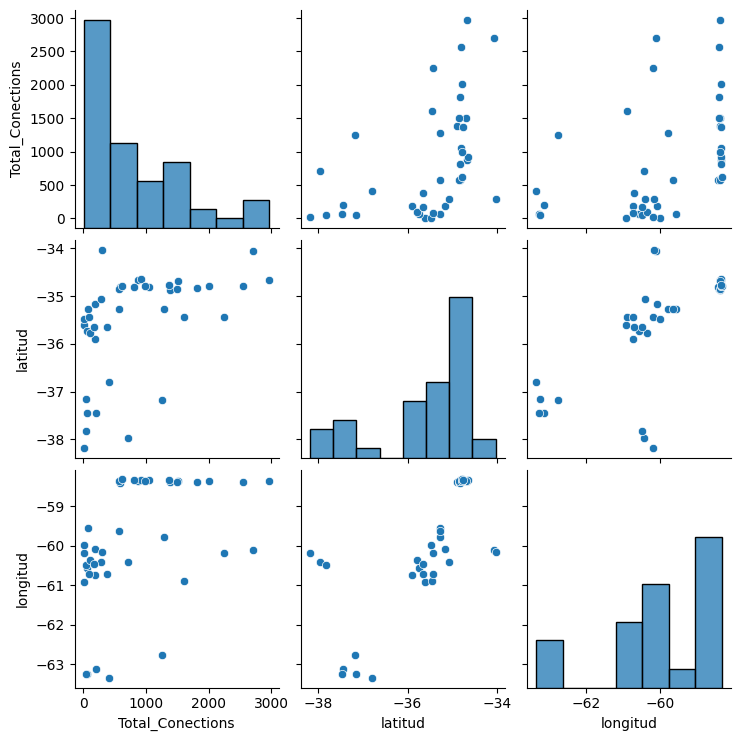

In [42]:
sns.pairplot(df_analisis2)

En el grafico 'Conexiones por Localidad' se observa que las localidad Avellanda, Arrecifes y Adrogué al contar con mas de 2500 conexiones. Mientras que los que cuentan con menor cantidad de conexiones son 12 de Octubre, Lucas Monteverde y Vásquez juntos con la sección Otros.

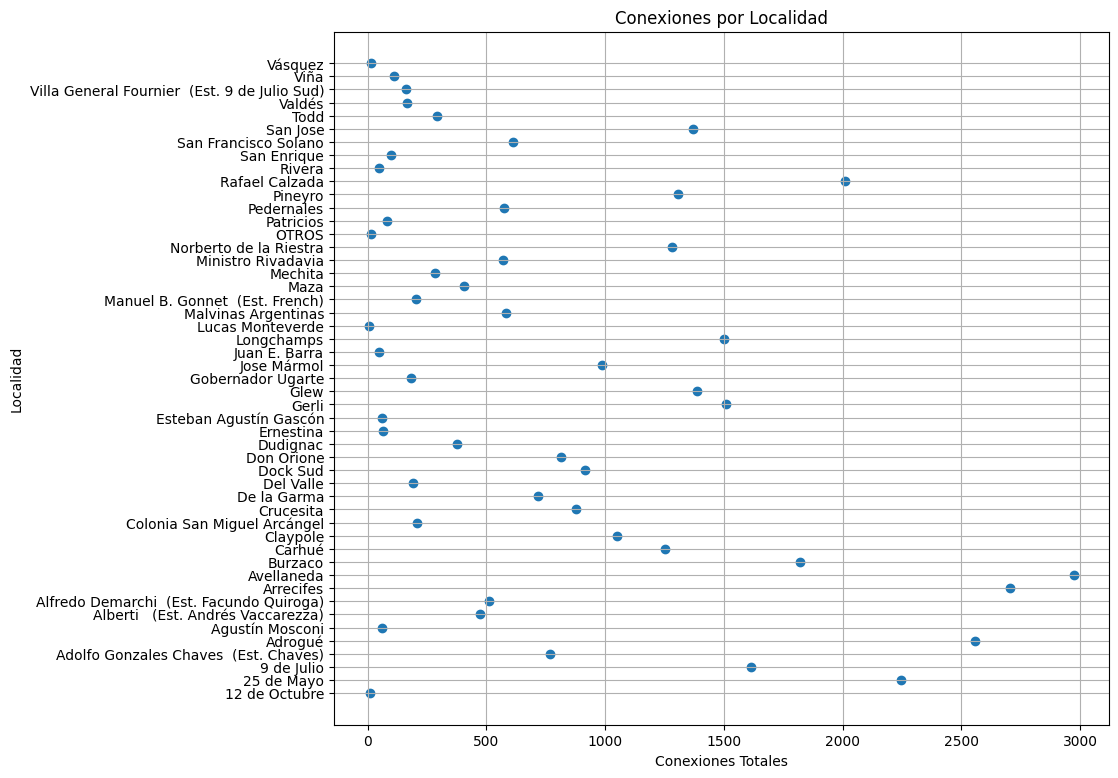

In [43]:
plt.figure(figsize=(10,9))
plt.scatter(data=df_analisis2, x='Total_Conections', y='Localidad')
plt.title('Conexiones por Localidad',loc='center')
plt.xlabel('Conexiones Totales')
plt.ylabel('Localidad')
plt.grid()
plt.show()

Guardando dataframe generado para Reporte de Visualizacion

In [44]:
df_analisis2.to_csv('..\\datasets\\dataset_vis\\vis_' + guid + '.csv',index=False)